In [1]:
from google.colab import files
uploaded = files.upload()

Saving temperatures.csv to temperatures.csv


In [2]:
import pandas as pd

df = pd.read_csv("temperatures.csv")
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [3]:
df_long = df.melt(id_vars=["YEAR"],
                  value_vars=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
                  var_name="MONTH", value_name="TEMP")

df_long.head()

,YEAR,MONTH,TEMP
0,1901,JAN,22.40
1,1902,JAN,24.93
2,1903,JAN,23.44
3,1904,JAN,22.50
4,1905,JAN,22.00


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

performance = {}

for month in df_long["MONTH"].unique():
    df_month = df_long[df_long["MONTH"] == month]
    X = df_month[["YEAR"]]
    y = df_month["TEMP"]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    performance[month] = {"MSE": mse, "MAE": mae, "R2": r2}

In [5]:
performance_df = pd.DataFrame(performance).T
performance_df = performance_df.round(4)
performance_df = performance_df.sort_index()

performance_df

,MSE,MAE,R2
APR,0.5551,0.5848,0.2923
AUG,0.1287,0.2822,0.4279
DEC,0.2817,0.3809,0.5361
FEB,0.7632,0.6790,0.4187
JAN,0.4619,0.5270,0.3312
JUL,0.1680,0.3148,0.2290
JUN,0.3425,0.4817,0.1383
MAR,0.7846,0.7144,0.3068
MAY,0.4344,0.5100,0.1662
NOV,0.2596,0.3803,0.4870


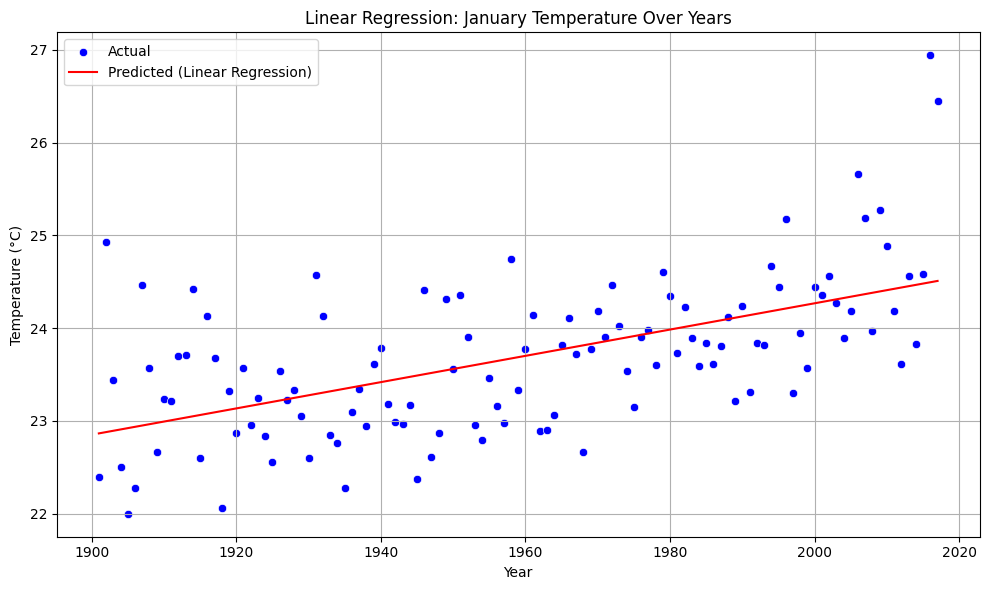

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_jan = df_long[df_long["MONTH"] == "JAN"]
X_jan = df_jan[["YEAR"]]
y_jan = df_jan["TEMP"]

model_jan = LinearRegression()
model_jan.fit(X_jan, y_jan)
y_pred_jan = model_jan.predict(X_jan)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="YEAR", y="TEMP", data=df_jan, label="Actual", color="blue")
plt.plot(df_jan["YEAR"], y_pred_jan, label="Predicted (Linear Regression)", color="red")
plt.title("Linear Regression: January Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()